In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['target_var']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target_var
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [4]:
df.drop('species',inplace=True, axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,target_var
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,target_var
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X=df.drop('target_var',axis=1)
y=df['target_var']

In [7]:
# Split into train & test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


clf_tree=DecisionTreeClassifier()


In [9]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
y_train.value_counts()

target_var
1    32
2    32
0    29
Name: count, dtype: int64

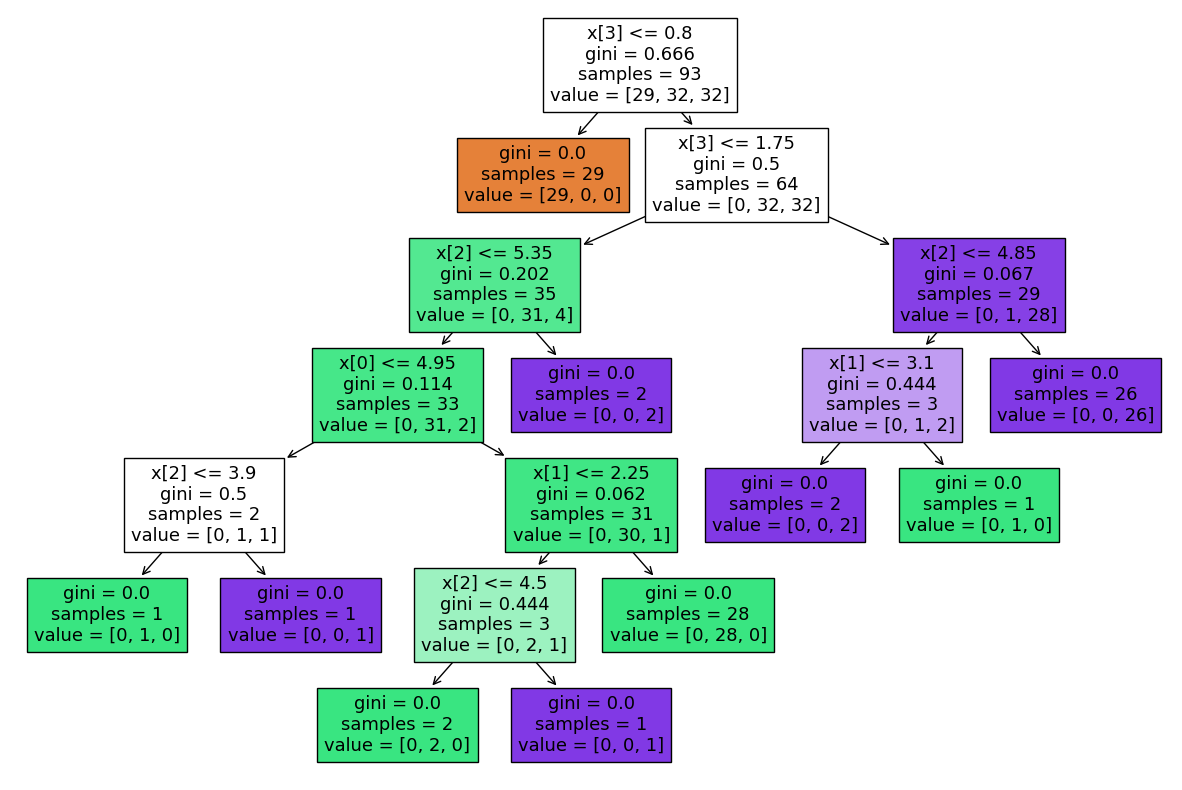

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(clf_tree, filled=True)
plt.show()

In [12]:
y_pred=clf_tree.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.9824561403508771

In [14]:
confusion_matrix(y_test,y_pred)

array([[21,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 17]], dtype=int64)

In [15]:
# Post pruning
clf_tree_pp=DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf_tree_pp.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

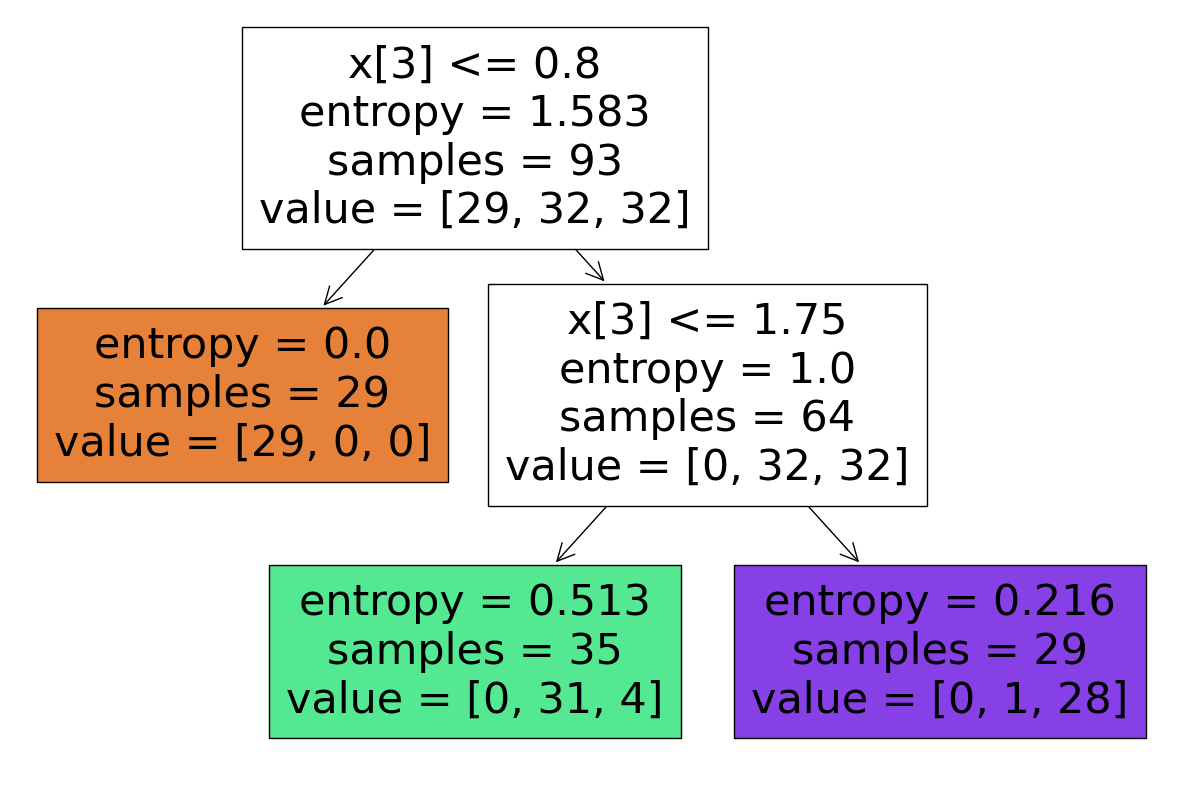

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(clf_tree_pp, filled=True)
plt.show()

In [17]:
y_pred_pp=clf_tree_pp.predict(X_test)
accuracy_score(y_test,y_pred_pp)

0.9824561403508771

In [18]:
# pre pruning using hyper parameter tuning
parameter={'criterion':["gini", "entropy", "log_loss"],
           'max_depth':[1,2,3,4,5],
           'max_features':['auto', 'sqrt', 'log2']
           }

In [19]:
grid=GridSearchCV(clf_tree,param_grid=parameter,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [20]:
grid.best_params_

{'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'log2'}

In [21]:
y_pred_grid=grid.predict(X_test)
accuracy_score(y_test,y_pred_grid)

0.9824561403508771

In [22]:
confusion_matrix(y_test,y_pred_grid)

array([[21,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 17]], dtype=int64)

In [23]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred_log=log_reg.predict(X_test)
accuracy_score(y_test,y_pred_log)

1.0

In [25]:
import pickle
pickle.dump(grid,open('model.pkl','wb'))